In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
labels_2hop_all = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6',
               'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']
labels_2hop_3 = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
labels_2hop_4 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
               'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
               'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']

labels_gr_all = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6',
                '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
                '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']
labels_gr_4 = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6']
labels_gr_5 = ['5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', '5-10', 
               '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19', '5-20', '5-21']


In [3]:
def load_json_convert(filepath):
    with open(f'./{filepath}/output.json') as f:
        real = json.load(f)

    with open(f'./{filepath}/random_output.json') as f:
        random = json.load(f)
    
    real = pd.DataFrame(real)
    real['domain'] = real['dataset'].str.split('-').str[0]
    random = pd.DataFrame(random)
    random['domain'] = random['dataset'].str.split('-').str[0]
    
    return real, random

In [15]:
def sig_profile(real, random, label, datasets, domain = "all"):
        
    # Prepare for plotting
    plt.figure(figsize=(10, 8))

    srp_data = []
    
    if domain != "all":
        real = real[real['domain'] == domain]
        random = random[random['domain'] == domain]
            
    for data in datasets:
        real_data = real[real['dataset'] == data][label]
        random_data = random[random['dataset'] == data][label]

        # Compute Delta_i for each subgraph
        epsilon = 4
        delta_i = {}
        for key in list(real_data):
            N_real_i = real_data[key].values
            N_rand_i = random_data[key].values
            delta_i[key] = (N_real_i - N_rand_i) / (N_real_i + N_rand_i + epsilon)

        # Normalize Delta_i to get SRP_i
        sum_delta_squared = sum([delta**2 for delta in delta_i.values()])
        srp_i = [delta / np.sqrt(sum_delta_squared) for delta in delta_i.values()]

        srp_data.append(srp_i)

        # Plot the Subgraph Ratio Profile
        plt.plot(label, srp_i, marker='o', label=f'{data}')

    if domain == "all":
        df = pd.DataFrame(srp_data, index = datasets).T
        correlation_matrix = df.corr(method='spearman')
    else:
        correlation_matrix = None

    # Plot settings
    plt.xlabel('2Hoplets Index')
    plt.ylabel('Normalized Significance Profile Score')
    plt.title(f'{domain} datasets')
    plt.ylim(-0.5, 0.5)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.legend()
    plt.xticks(rotation=45)

    # num_labels_to_show = 8
    # step = len(labels) // (num_labels_to_show - 1)
    # visible_positions = list(range(0, len(labels), step))[:num_labels_to_show]
    # visible_labels = [labels[i] for i in visible_positions]
    # plt.xticks(visible_positions, visible_labels)


    # Save the plot
    # filename = f'{domain}_extend_3.png'
    # plt.savefig(f'./figure/{filename}')

    # Display the plot
    plt.show()
    return correlation_matrix

In [16]:
def conf_mat(labels, correlation_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='YlOrBr', cbar=True, square=True, vmin=-0.1, vmax=1)
    plt.title('Correlation Coefficient Matrix')
    plt.xlabel('Datasets')
    plt.ylabel('Datasets')
    # Add custom colored labels
    ax = plt.gca()
    ax.set_xticks(np.arange(len(labels)) + 0.5)
    ax.set_yticks(np.arange(len(labels)) + 0.5)
    ax.set_xticklabels(labels, rotation=90, ha='right', rotation_mode='anchor')
    ax.set_yticklabels(labels, rotation=0)
    #ax.set_xticklabels([''] * len(labels))
    #ax.set_yticklabels([''] * len(labels))
    plt.show()

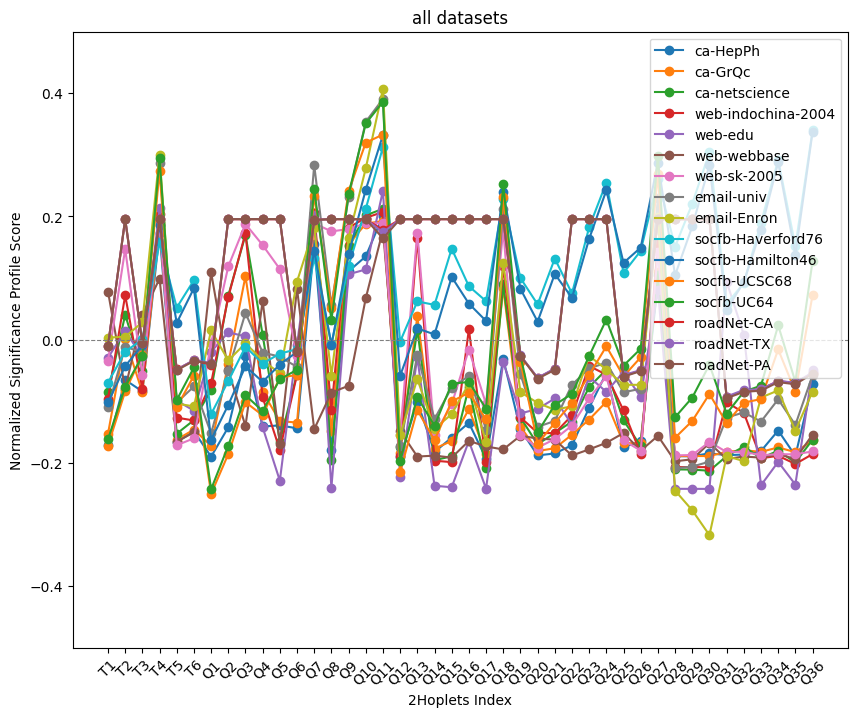

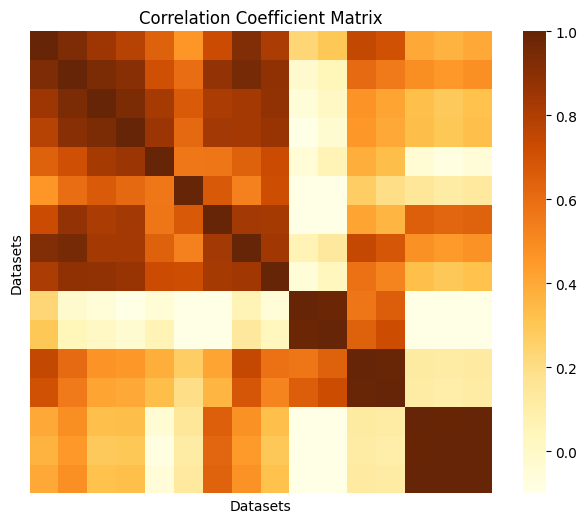

In [42]:
datasets = [
            'ca-HepPh', 'ca-GrQc', 'ca-netscience',
            'web-indochina-2004', 'web-edu', 'web-webbase', 'web-sk-2005',
            'email-univ','email-Enron', #'email-EU',
            'socfb-Haverford76', 'socfb-Hamilton46', 'socfb-UCSC68', 'socfb-UC64',
            'roadNet-CA', 'roadNet-TX', 'roadNet-PA',
            #'tags-ask-ubuntu', 'tags-math-sx',
            ]
real, random = load_json_convert("extend_output")
domain = real[real['dataset'] == 'datasets']['domain']
corr = sig_profile(real, random, labels_2hop_all, datasets)
conf_mat(domain, corr)

In [44]:
corr

,ca-HepPh,ca-GrQc,ca-netscience,web-indochina-2004,web-edu,web-webbase,web-sk-2005,email-univ,email-Enron,socfb-Haverford76,socfb-Hamilton46,socfb-UCSC68,socfb-UC64,roadNet-CA,roadNet-TX,roadNet-PA
ca-HepPh,1.000000,0.935013,0.848959,0.781865,0.645085,0.461470,0.725954,0.926262,0.814278,0.233125,0.296491,0.748319,0.705372,0.399238,0.371364,0.402317
ca-GrQc,0.935013,1.000000,0.936472,0.903898,0.709748,0.597764,0.878616,0.955433,0.885909,-0.020015,0.048699,0.612835,0.555141,0.487238,0.453529,0.482862
ca-netscience,0.848959,0.936472,1.000000,0.938903,0.824163,0.666478,0.814764,0.828377,0.882019,-0.055020,0.012074,0.468763,0.412365,0.326959,0.289361,0.318532
web-indochina-2004,0.781865,0.903898,0.938903,1.000000,0.855603,0.616239,0.835508,0.830160,0.865003,-0.108662,-0.029414,0.455474,0.399076,0.332307,0.298922,0.325824
web-edu,0.645085,0.709748,0.824163,0.855603,1.000000,0.561786,0.567944,0.644113,0.726764,-0.044810,0.054858,0.384005,0.332631,-0.035572,-0.079491,-0.050320
web-webbase,0.461470,0.597764,0.666478,0.616239,0.561786,1.000000,0.672798,0.528563,0.719634,-0.334252,-0.263755,0.265700,0.195041,0.151608,0.114334,0.134754
web-sk-2005,0.725954,0.878616,0.814764,0.835508,0.567944,0.672798,1.000000,0.833077,0.824974,-0.211571,-0.163115,0.411555,0.361154,0.651568,0.627745,0.642817
email-univ,0.926262,0.955433,0.828377,0.830160,0.644113,0.528563,0.833077,1.000000,0.840694,0.060368,0.137833,0.742322,0.682684,0.477028,0.448181,0.473787
email-Enron,0.814278,0.885909,0.882019,0.865003,0.726764,0.719634,0.824974,0.840694,1.000000,-0.052913,0.032493,0.585447,0.520784,0.326959,0.292926,0.319990
socfb-Haverford76,0.233125,-0.020015,-0.055020,-0.108662,-0.044810,-0.334252,-0.211571,0.060368,-0.052913,1.000000,0.982984,0.567620,0.653351,-0.136861,-0.134754,-0.131513


In [18]:
from collections import defaultdict

domains_indices = {
    'contact': [0, 1],
    'socfb' : [2, 3],
    'collaboration': [4, 5, 6],
    'tags' : [7, 8]
}

labels = ['d1-2', 'd1-3', 'd1-4', 'd1-5', 'd1-6', 'd1-7', 'd1-8', 'd1-9', 'd1-10', 'd1-11',
               'd2-2', 'd2-3', 'd2-4', 'd2-5', 'd2-6', 'd2-7', 'd2-8',
               'd3-2', 'd3-3', 'd3-4', 'd3-5', 'd3-6', 'd3-7', 'd3-8',
               'd4-2', 'd4-3', 
               'd5-2', 
               'd6-2', 'd6-3', 'd6-4']

contributions = defaultdict(float)
for domain_name, indices in domains_indices.items():
    domain_indices = indices
    other_indices = [i for d in domains if d != domain_name for i in domains_indices[d]]

    domain_correlation = correlation_matrix.loc[domain_indices, other_indices]
    avg_corr = domain_correlation.mean().mean()

    print(f"\n{domain_name} domain average correlation with other domains: {avg_corr:.2f}")

    # 각 성분을 제거한 후 상관 계수 계산
    for col in df.columns:
        temp_df = df.drop(columns=[col])
        temp_corr_matrix = temp_df.T.corr(method='pearson')
        temp_domain_corr = temp_corr_matrix.loc[domain_indices, other_indices]
        temp_avg_corr = temp_domain_corr.mean().mean()
        contribution = temp_avg_corr - avg_corr
        contributions[col] += contribution

    # 상관 계수에 가장 큰 영향을 미치는 성분 확인
contributions = sorted(contributions.items(), key=lambda x: x[1], reverse=True)
print(f"Top contributing components for {domain_name} domain:")
for col, contribution in contributions[:12]:
    print(f"{labels[int(col)]} ({labels_max_dim[labels[int(col)]]}): {contribution:.4f}")


contact domain average correlation with other domains: 0.13

socfb domain average correlation with other domains: 0.50

collaboration domain average correlation with other domains: 0.46

tags domain average correlation with other domains: 0.25
Top contributing components for tags domain:
d1-3 (8): 0.6495
d1-2 (9): 0.2888
d1-5 (7): 0.1261
d1-6 (7): 0.0964
d1-4 (8): -0.1114
d1-7 (7): -2.0206


In [19]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'contact': [0, 1],
    'socfb' : [2, 3],
    'collaboration': [4, 5, 6],
    'tags' : [7, 8]
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(correlation_matrix, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


Domain intra-correlations:
('contact', 'contact'): 0.8502
('socfb', 'socfb'): 0.9921
('collaboration', 'collaboration'): 0.9734
('tags', 'tags'): 0.9204

Domain inter-correlations:
('contact', 'socfb'): 0.7906
('contact', 'collaboration'): 0.0529
('contact', 'tags'): -0.4058
('socfb', 'contact'): 0.7906
('socfb', 'collaboration'): 0.5714
('socfb', 'tags'): 0.1164
('collaboration', 'contact'): 0.0529
('collaboration', 'socfb'): 0.5714
('collaboration', 'tags'): 0.7678
('tags', 'contact'): -0.4058
('tags', 'socfb'): 0.1164
('tags', 'collaboration'): 0.7678

Average intra-domain correlation: 0.9472
Average inter-domain correlation: 0.3452


In [99]:
def calculate_average_correlations(correlation_matrix, domain_indices):
    domain_intra_corr = {}
    domain_inter_corr = {}
    intra_domain_corr = []
    inter_domain_corr = []

    for domain1, indices1 in domain_indices.items():
        for domain2, indices2 in domain_indices.items():
            corrs = correlation_matrix.loc[indices1, indices2].values.flatten()
            if domain1 == domain2:
                corrs = [corr for corr in corrs if corr != 1.0]
                mean_corr = np.mean(corrs)
                domain_intra_corr[(domain1, domain2)] = mean_corr
                intra_domain_corr.extend(corrs)
            else:
                mean_corr = np.mean(corrs)
                domain_inter_corr[(domain1, domain2)] = mean_corr
                inter_domain_corr.extend(corrs)

    print(intra_domain_corr)
    print(inter_domain_corr)
    average_intra_domain_corr = np.mean(intra_domain_corr) 
    average_inter_domain_corr = np.mean(inter_domain_corr)

    return domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr

# 도메인 별 유사도 계산
domains_indices = {
    'contact': [0, 1],
    'socfb' : [2, 3],
    'collaboration': [4, 5, 6],
    'tags' : [7, 8]
}

domain_intra_corr, domain_inter_corr, average_intra_domain_corr, average_inter_domain_corr = calculate_average_correlations(correlation_matrix, domains_indices)

# 도메인 별 유사도 출력
print("Domain intra-correlations:")
for domains, corr in domain_intra_corr.items():
    print(f'{domains}: {corr:.4f}')

print("\nDomain inter-correlations:")
for domains, corr in domain_inter_corr.items():
    print(f'{domains}: {corr:.4f}')

# 평균 intra-domain 및 inter-domain 유사도 출력
print(f'\nAverage intra-domain correlation: {average_intra_domain_corr:.4f}')
print(f'Average inter-domain correlation: {average_inter_domain_corr:.4f}')


[0.9833249845024693, 0.9833249845024693, 0.9965387402785034, 0.9965387402785034, 0.8962929847539683, 0.9442832627488503, 0.8962929847539683, 0.9099702897582834, 0.9442832627488503, 0.9099702897582834, 0.966136237260661, 0.966136237260661]
[0.9889129942915723, 0.9881228180293854, 0.9820140484083897, 0.9688541133879356, 0.9104166276729153, 0.9403533244738363, 0.8622360872381933, 0.9250904294842052, 0.897985826799347, 0.8469172165381801, 0.6920133343923601, 0.7759247701877341, 0.6796335286240126, 0.775036962331901, 0.9889129942915723, 0.9820140484083897, 0.9881228180293854, 0.9688541133879356, 0.8992872162773778, 0.9259757962806012, 0.8466221143185492, 0.89639839651278, 0.9447458276088913, 0.8600929815329359, 0.7088530239908529, 0.7742608141140677, 0.7233633842783385, 0.7809013609266744, 0.9104166276729153, 0.9250904294842052, 0.9403533244738363, 0.897985826799347, 0.8622360872381933, 0.8469172165381801, 0.8992872162773778, 0.89639839651278, 0.9259757962806012, 0.9447458276088913, 0.84662

4 :  0.98 0.87

5 :  0.95 0.84

4+5 : 0.96 0.84